##### [Creating Features Tutorial](https://www.kaggle.com/code/ryanholbrook/creating-features)

### Tips on Discovering New Features
- Understand the features. Refer to your dataset's **data documentation**, if available.
- Research the problem domain to acquire **domain knowledge**
    - starts with wikipedia
    - search [journal article](https://scholar.google.com/)
- Study previous work
    - search past [winning solution](https://www.kaggle.com/code/sudalairajkumar/winning-solutions-of-kaggle-competitions/notebook)
- Use data visualization

### Tips on Creating Features
- It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
- Linear models learn sums and differences naturally, but can't learn anything more complex.
- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
- Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
- Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.

In [3]:
# %load common_import_seaborn.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [22]:
pd.options.display.float_format='{:,.02f}'.format

In [6]:
df_acc = pd.read_csv('data/US_Accidents_Dec21_updated.csv')

In [14]:
df_floats=df_acc.select_dtypes(include='float64').copy()

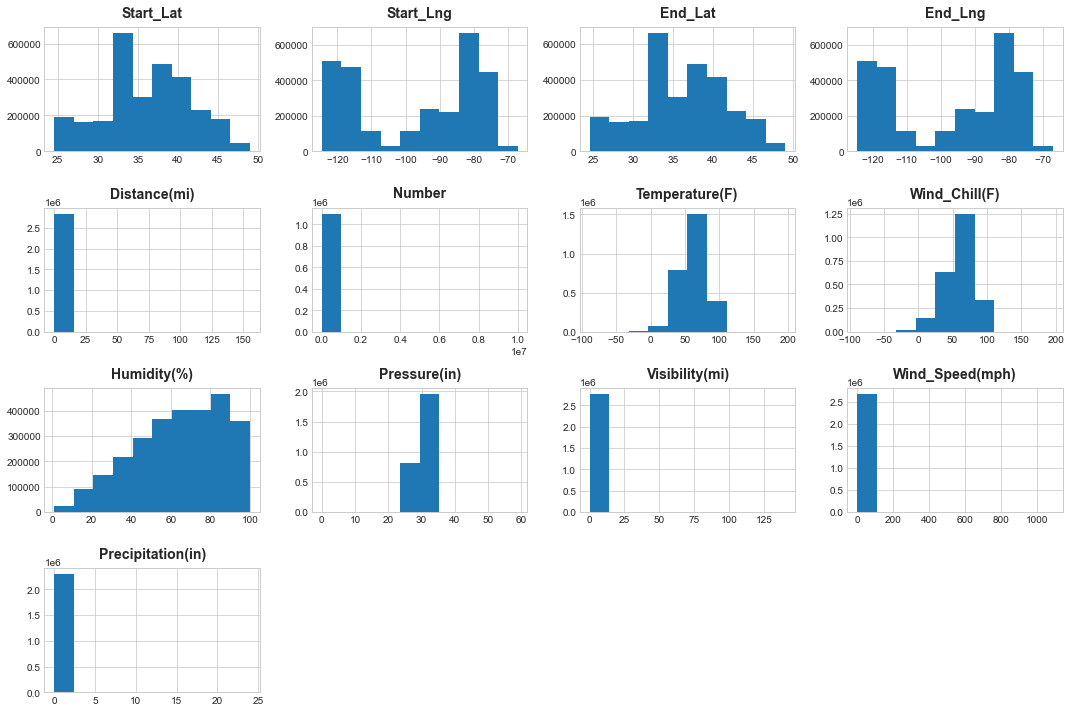

In [9]:
df_floats.hist(figsize=(15,10));

<AxesSubplot:xlabel='LogWindSpeed', ylabel='Density'>

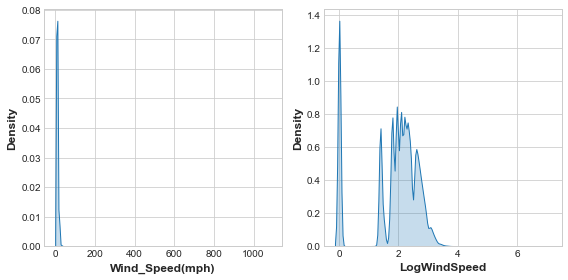

In [15]:
df_floats['LogWindSpeed']=df_floats['Wind_Speed(mph)'].apply(np.log1p)

fig, axs = plt.subplots(1,2, figsize=(8,4))
sns.kdeplot(df_floats['Wind_Speed(mph)'], shade=True, ax=axs[0])
sns.kdeplot(df_floats.LogWindSpeed, shade=True, ax=axs[1])

In [23]:
df_floats[['LogWindSpeed','Wind_Speed(mph)']].describe()

,LogWindSpeed,Wind_Speed(mph)
count,"2,687,398.00","2,687,398.00"
mean,1.83,7.40
std,0.90,5.53
min,0.00,0.00
25%,1.50,3.50
50%,2.08,7.00
75%,2.40,10.00
max,6.99,"1,087.00"


In [38]:
df0 = df_floats[['LogWindSpeed','Wind_Speed(mph)']]
# df0.head()
df1=df0.melt(value_vars=['LogWindSpeed','Wind_Speed(mph)'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690684 entries, 0 to 5690683
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   variable  object 
 1   value     float64
dtypes: float64(1), object(1)
memory usage: 86.8+ MB


<AxesSubplot:xlabel='value', ylabel='variable'>

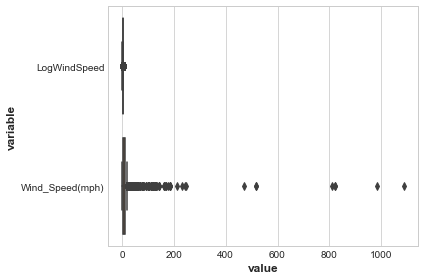

In [41]:
sns.boxplot(data=df1,x='value',y='variable')

# Check count for binary features

In [43]:
roadway_features=df_acc.select_dtypes(include='boolean').columns.to_list()

In [44]:
df_acc['roadway_features']=df_acc[roadway_features].sum(axis=1)

In [45]:
df_acc[roadway_features + ['roadway_features']].head(10)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,roadway_features
0,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,True,False,False,False,False,False,False,False,False,1
3,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,False,False,False,False,False,False,False,True,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,True,False,False,False,False,False,False,False,False,1
8,False,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,False,0


### Building-Up and Breaking-Down Features
Often you'll have complex strings that can usefully be broken into simpler pieces. Some common examples:

- ID numbers: '123-45-6789'
- Phone numbers: '(999) 555-0123'
- Street addresses: '8241 Kaggle Ln., Goose City, NV'
- Internet addresses: 'http://www.kaggle.com
- Product codes: '0 36000 29145 2'
- Dates and times: 'Mon Sep 30 07:06:05 2013'

In [46]:
def get_columns_by_dtypes(df,dtypes):
    """ 
        return column names by dtype
        df: dataframe
        dtypes: list of dtypes to select
        return: list of column names
    """
    return df.dtypes[df.dtypes.isin(dtypes)].index.to_list()